# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 36.5MB/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.02MB/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.96MB/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.0652, -0.0511,  0.2142,  0.1428, -0.6106, -0.4714,  0.3151,  0.7684,
         -0.3291, -0.6579]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [8]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.2627)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

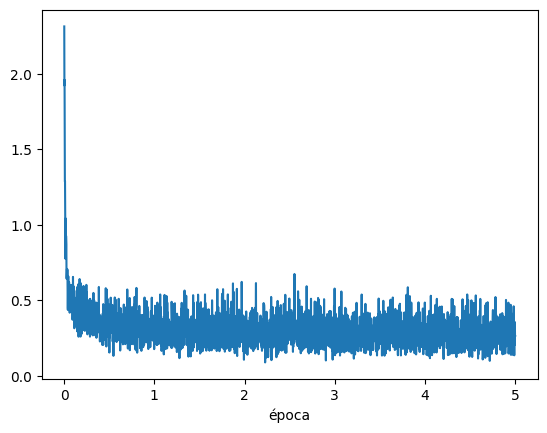

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

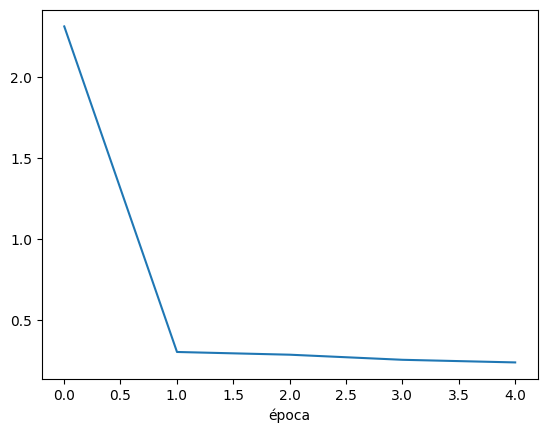

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?

  R: O tamanho do mini-batch é 100, como definido pelo código batch_size = 100

2. Em uma época, quantos mini-batches existem?

  R: O dataset MNIST de treinamento possui 60.000 amostras. Com um mini-batch de tamanho 100. Portanto, existem 600 mini-batches em uma época.

3. Qual é a definição de época?

  R: Uma época é definida como uma passagem completa por todo o conjunto de dados de treinamento. Durante uma época, o modelo processa todas as amostras do dataset, divididas em mini-batches, e ajusta seus parâmetros com base no erro calculado em cada lote.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [12]:
# Resolução do exercicio 1:
batch_size = 600
n_epochs = 4

losses = []
total_trained_samples = 0

for epoch in range(n_epochs):
    for batch_idx, (x_train, y_train) in enumerate(loader_train, start=1):

        inputs = Variable(x_train.view(-1, 28 * 28))
        targets = Variable(y_train)

        outputs = model(inputs)

        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        losses.append(loss.item())

        # Print ao final do minibatch
        print(f"Época: {epoch + 1}/{n_epochs}, Batch: {batch_idx}/{len(loader_train)}, Perda: {loss.item():.6f}")


Época: 1/4, Batch: 1/600, Perda: 0.318104
Época: 1/4, Batch: 2/600, Perda: 0.298600
Época: 1/4, Batch: 3/600, Perda: 0.207529
Época: 1/4, Batch: 4/600, Perda: 0.259913
Época: 1/4, Batch: 5/600, Perda: 0.153803
Época: 1/4, Batch: 6/600, Perda: 0.194538
Época: 1/4, Batch: 7/600, Perda: 0.175995
Época: 1/4, Batch: 8/600, Perda: 0.302533
Época: 1/4, Batch: 9/600, Perda: 0.238956
Época: 1/4, Batch: 10/600, Perda: 0.289206
Época: 1/4, Batch: 11/600, Perda: 0.305178
Época: 1/4, Batch: 12/600, Perda: 0.387508
Época: 1/4, Batch: 13/600, Perda: 0.356011
Época: 1/4, Batch: 14/600, Perda: 0.160159
Época: 1/4, Batch: 15/600, Perda: 0.187527
Época: 1/4, Batch: 16/600, Perda: 0.190779
Época: 1/4, Batch: 17/600, Perda: 0.244231
Época: 1/4, Batch: 18/600, Perda: 0.319587
Época: 1/4, Batch: 19/600, Perda: 0.182338
Época: 1/4, Batch: 20/600, Perda: 0.314467
Época: 1/4, Batch: 21/600, Perda: 0.342112
Época: 1/4, Batch: 22/600, Perda: 0.230268
Época: 1/4, Batch: 23/600, Perda: 0.261546
Época: 1/4, Batch: 2

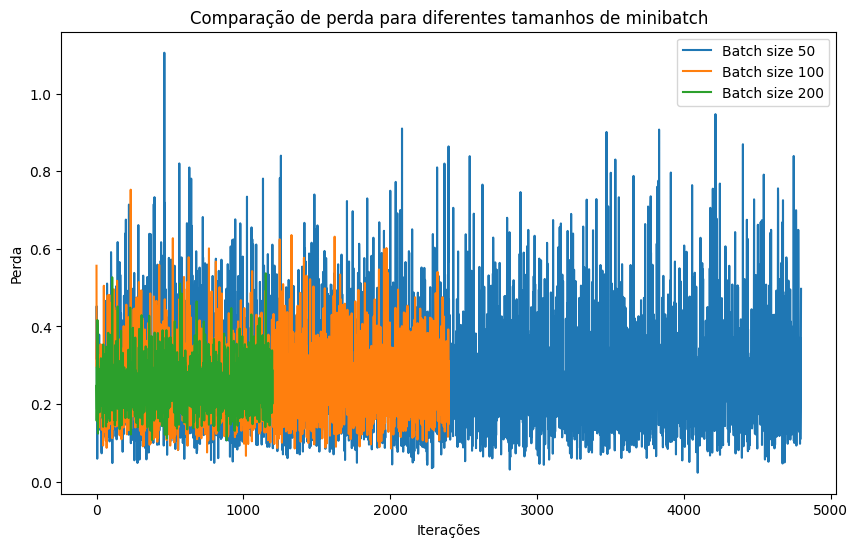

In [13]:
# Resolução do exercicio 2
batch_sizes = [50, 100, 200]
results = {}

for batch_size in batch_sizes:
    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

    losses = []
    for epoch in range(n_epochs):
        for x_train, y_train in loader_train:
            inputs = Variable(x_train.view(-1, 28 * 28))
            targets = Variable(y_train)

            outputs = model(inputs)

            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            losses.append(loss.item())

    results[batch_size] = losses

plt.figure(figsize=(10, 6))
for batch_size, loss_values in results.items():
    plt.plot(range(len(loss_values)), loss_values, label=f"Batch size {batch_size}")

plt.xlabel("Iterações")
plt.ylabel("Perda")
plt.title("Comparação de perda para diferentes tamanhos de minibatch")
plt.legend()
plt.show()



## Conclusões sobre os experimentos deste notebook


De acordo com o grafico do exercicio 2:

Batch size 50 (linha azul):

*   Apresenta maior variabilidade na perda a cada iteração.
*   Apesar disso, a perda parece atingir valores baixos rapidamente, indicando uma convergência inicial mais rápida.

Batch size 100 (linha laranja):

*   Reduz a variabilidade em relação ao batch size 50, mostrando um gradiente mais estável.
*   Converge de forma mais suave e equilibrada.
*   É uma opção em termos de estabilidade e rapidez.

Batch size 200 (linha verde):

*   Apresenta a menor variabilidade entre as iterações, indicando que o gradiente é mais estável.
*   No entanto, a convergência inicial é mais lenta, já que mais dados são usados em cada atualização, tornando o treinamento menos responsivo a variações locais nos dados.







